# QUESTIONS
gaussianFilterSpatial1D -> Valores correctos (entre 0 y 1)

ApplyGaussianFilterSpatial -> Sigma tiene que ir a menor valor ?

gaussianFilterFrec -> debe devolver la imagen en espacial y el filtro o solo filtro

ApplyGaussianFilterFrec -> contrario de ApplyGaussianFilterSpatial

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.io as io
img = data.camera()


In [105]:
def gaussianFilterSpatial1D(sigma):
    N = int(2 * np.ceil(3 * sigma) + 1)
    center = (N // 2) + 1
    kernel = np.zeros(N)
    # Rellenar el kernel con la formula
    for x in range(N):
        kernel[x] = np.exp(-((x - center)**2) / (2 * sigma ** 2))
    # Normaliza el kernel para que la suma sea 1
    # kernel /= np.sum(kernel)
    
    return kernel

In [95]:
def ApplyGaussianFilterSpatial(inImage, sigma):
    conv = gaussianFilterSpatial1D(sigma)
    # Usar apply_along_axis  para aplicar a las filas la funcion
    img = np.apply_along_axis(lambda x: np.convolve(x, conv, mode="same"), axis=1, arr=inImage)
    # Aplicar otra vez para la transposicion
    filter = np.apply_along_axis(lambda x: np.convolve(x, conv, mode="same"), axis=0, arr=img) 
    return filter

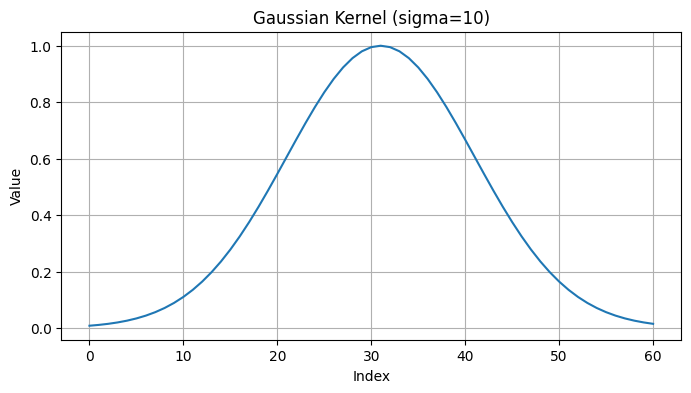

25.00624270133526


In [106]:
# Assuming gaussianFilterSpatial1D function is already defined
sigma = 10
kernel = gaussianFilterSpatial1D(sigma)

# Plot the kernel
plt.figure(figsize=(8, 4))
plt.plot(kernel)
plt.title(f"Gaussian Kernel (sigma={sigma})")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()
print(np.sum(kernel))

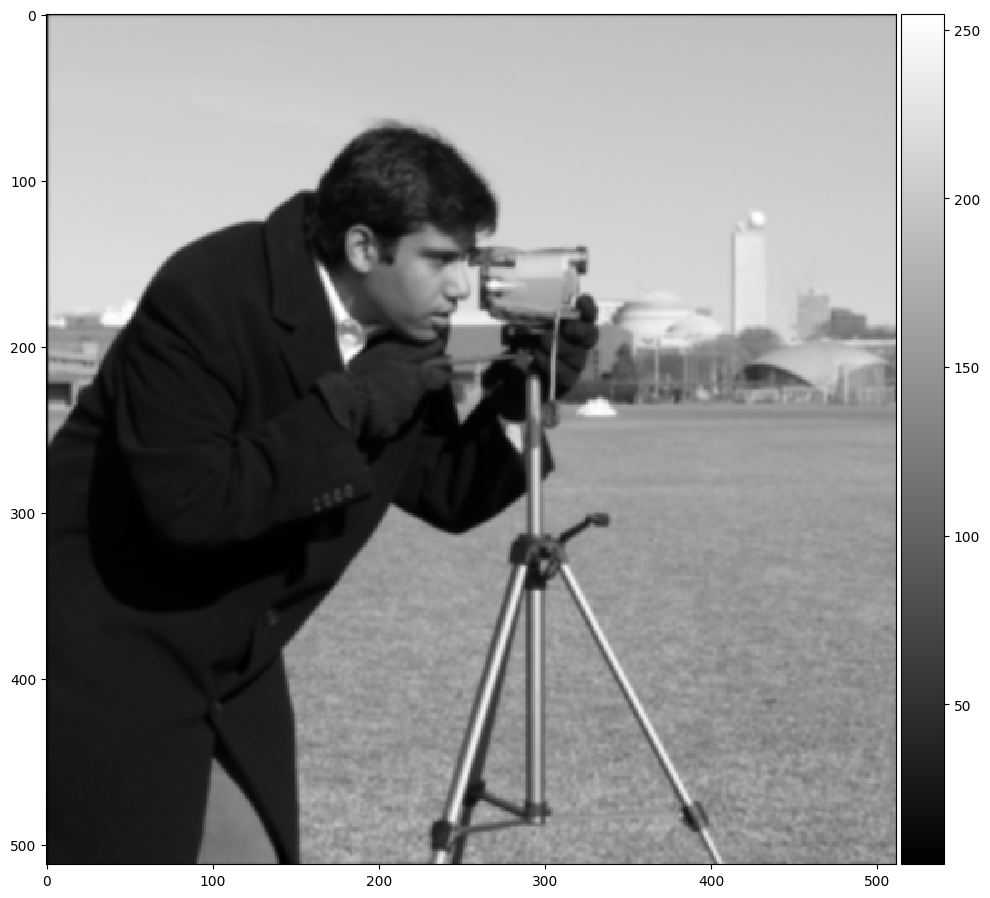

In [99]:
# Assuming gaussianFilterSpatial1D function is already defined
sigma = 1
kernel = ApplyGaussianFilterSpatial(img, sigma)

# Plot the kernel
plt.figure(figsize=(10, 10))
io.imshow(kernel, cmap="grey")

In [100]:
def gaussianFilterFrec(inImage, sigma):
    # Obtenemos las dimensiones
    N, M = inImage.shape
    # Obteneter la transformada de fourier
    img_frec = np.fft.fft2(inImage)
    img_frec = np.fft.fftshift(img_frec)
    
    # Crea un filtro gaussiano en el dominio de la frecuencia
    x = np.linspace(-M // 2, M // 2, M)
    y = np.linspace(-N // 2, N // 2, N)
    X, Y = np.meshgrid(x, y)
    
    # Filtro gaussiano
    gaussian_kernel = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    
    # NECESARIO VOLVER A ESPACIAL ?
    
    # Aplicar el filtro
    filtered_image_frec = img_frec * gaussian_kernel
    
    # Transformada inversa para volver al dominio espacial
    filtered_image = np.fft.ifftshift(filtered_image_frec)
    filtered_image = np.fft.ifft2(filtered_image)
    return np.abs(filtered_image), gaussian_kernel

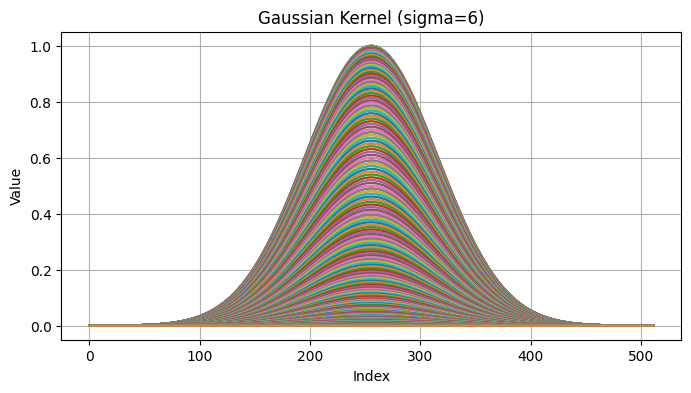

In [104]:
_, kernel = gaussianFilterFrec(img, 60)

# Plot the kernel
plt.figure(figsize=(8, 4))
plt.plot(kernel)
plt.title(f"Gaussian Kernel (sigma={sigma})")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [102]:
def ApplyGaussianFilterFrec(inImage, sigma):
    filtered_image_frec, _ = gaussianFilterFrec(inImage, sigma)
    return filtered_image_frec

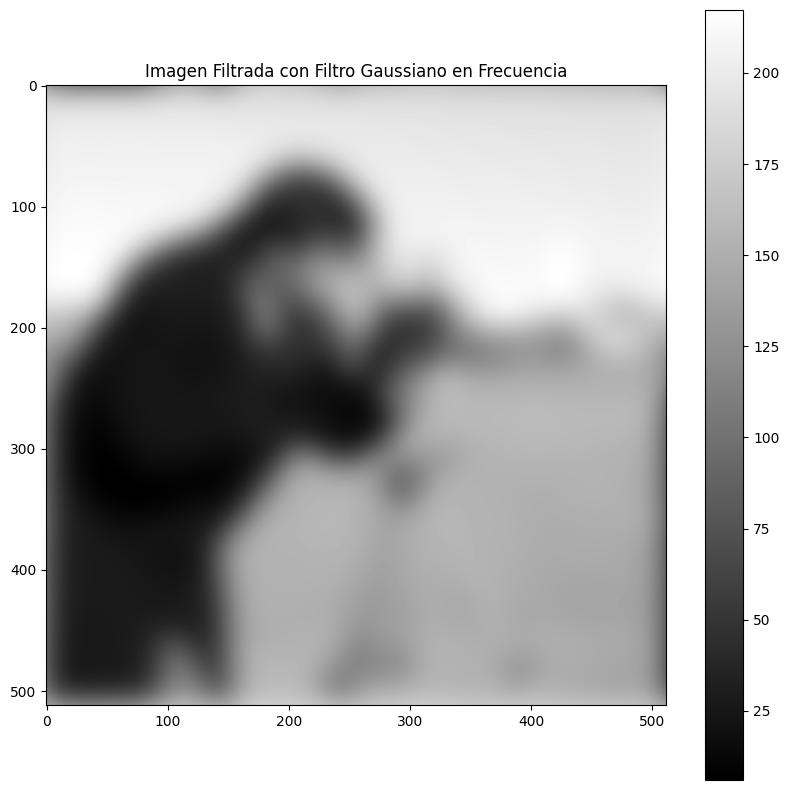

In [103]:
sigma = 6
filtered_image = ApplyGaussianFilterFrec(img, sigma)

# Visualización de la imagen filtrada
plt.figure(figsize=(10, 10))
plt.imshow(filtered_image, cmap="gray")
plt.title("Imagen Filtrada con Filtro Gaussiano en Frecuencia")
plt.colorbar()
plt.show()
